=== VÍ DỤ 1: K-MEANS CƠ BẢN ===
Số điểm dữ liệu: 300
Số cụm thực tế: 4
Shape dữ liệu: (300, 2)


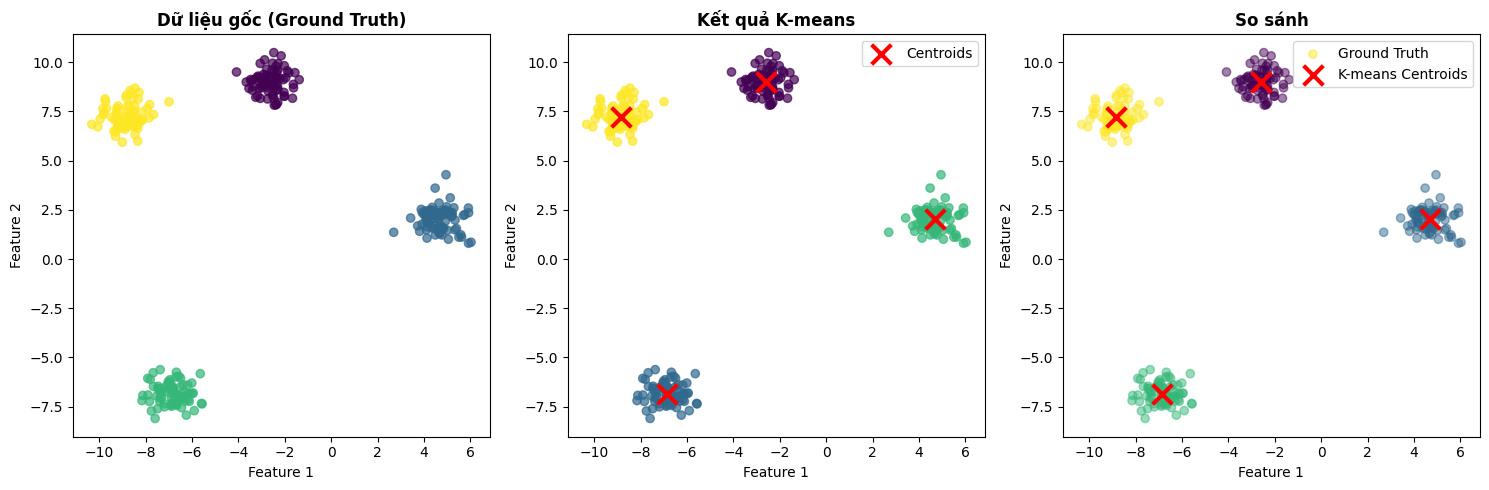


=== ĐÁNH GIÁ KẾT QUẢ ===
Adjusted Rand Index: 1.000
Silhouette Score: 0.876
Inertia (Sum of squared distances to centroids): 203.89
Số lần lặp: 2

=== PHÂN TÍCH ĐẦU RA K-MEANS ===
1. LABELS_ - Nhãn cụm của từng điểm:
   - Shape: (300,)
   - Dạng dữ liệu: <class 'numpy.ndarray'>
   - Mảng 1 chiều với 300 phần tử
   - Giá trị đầu 20 điểm: [3 3 0 1 3 1 2 1 0 2 0 2 0 0 3 0 3 2 0 0]
   - Số cụm duy nhất: [0 1 2 3]

2. CLUSTER_CENTERS_ - Tọa độ tâm của từng cụm:
   - Shape: (4, 2)
   - Dạng dữ liệu: <class 'numpy.ndarray'>
   - Mảng 2 chiều: 4 cụm × 2 features
   - Tọa độ các tâm:
     Cụm 0: (-2.61, 8.99)
     Cụm 1: (-6.85, -6.85)
     Cụm 2: (4.69, 2.01)
     Cụm 3: (-8.83, 7.24)

3. PHÂN BỐ SỐ ĐIỂM TRONG CÁC CỤM:
   - Cụm 0: 75 điểm (25.0%)
   - Cụm 1: 75 điểm (25.0%)
   - Cụm 2: 75 điểm (25.0%)
   - Cụm 3: 75 điểm (25.0%)

4. SO SÁNH LABELS_ VÀ Y_PRED:
   - kmeans.labels_ và y_pred có giống nhau? True
   - Cả hai đều có shape: (300,) và (300,)


In [2]:
# ============== VÍ DỤ 1: K-MEANS CƠ BẢN VỚI DỮ LIỆU SINH NGẪU NHIÊN ==============
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Tạo dữ liệu mẫu
np.random.seed(42)
n_samples = 300
X, y_true = make_blobs(n_samples=n_samples, centers=4, cluster_std=0.60, random_state=42)

print("=== VÍ DỤ 1: K-MEANS CƠ BẢN ===")
print(f"Số điểm dữ liệu: {n_samples}")
print(f"Số cụm thực tế: 4")
print(f"Shape dữ liệu: {X.shape}")

# Áp dụng K-means
k = 4  # Số cụm
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

# Lấy tâm các cụm
centers = kmeans.cluster_centers_

# Vẽ biểu đồ
plt.figure(figsize=(15, 5))

# Subplot 1: Dữ liệu gốc
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.7)
plt.title('Dữ liệu gốc (Ground Truth)', fontsize=12, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Subplot 2: Kết quả K-means
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('Kết quả K-means', fontsize=12, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Subplot 3: So sánh
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.5, label='Ground Truth')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3, label='K-means Centroids')
plt.title('So sánh', fontsize=12, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

# Đánh giá kết quả
from sklearn.metrics import adjusted_rand_score, silhouette_score
ari_score = adjusted_rand_score(y_true, y_pred)
silhouette_avg = silhouette_score(X, y_pred)

print(f"\n=== ĐÁNH GIÁ KẾT QUẢ ===")
print(f"Adjusted Rand Index: {ari_score:.3f}")
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Inertia (Sum of squared distances to centroids): {kmeans.inertia_:.2f}")
print(f"Số lần lặp: {kmeans.n_iter_}")

# ============== PHÂN TÍCH ĐẦU RA K-MEANS ===============
print(f"\n=== PHÂN TÍCH ĐẦU RA K-MEANS ===")
print("1. LABELS_ - Nhãn cụm của từng điểm:")
print(f"   - Shape: {kmeans.labels_.shape}")
print(f"   - Dạng dữ liệu: {type(kmeans.labels_)}")
print(f"   - Mảng 1 chiều với {kmeans.labels_.shape[0]} phần tử")
print(f"   - Giá trị đầu 20 điểm: {kmeans.labels_[:20]}")
print(f"   - Số cụm duy nhất: {np.unique(kmeans.labels_)}")

print(f"\n2. CLUSTER_CENTERS_ - Tọa độ tâm của từng cụm:")
print(f"   - Shape: {kmeans.cluster_centers_.shape}")
print(f"   - Dạng dữ liệu: {type(kmeans.cluster_centers_)}")
print(f"   - Mảng 2 chiều: {k} cụm × {X.shape[1]} features")
print(f"   - Tọa độ các tâm:")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"     Cụm {i}: ({center[0]:.2f}, {center[1]:.2f})")

# Thống kê phân bố các cụm
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(f"\n3. PHÂN BỐ SỐ ĐIỂM TRONG CÁC CỤM:")
for cluster_id, count in zip(unique, counts):
    print(f"   - Cụm {cluster_id}: {count} điểm ({count/len(X)*100:.1f}%)")

# So sánh với y_pred
print(f"\n4. SO SÁNH LABELS_ VÀ Y_PRED:")
print(f"   - kmeans.labels_ và y_pred có giống nhau? {np.array_equal(kmeans.labels_, y_pred)}")
print(f"   - Cả hai đều có shape: {kmeans.labels_.shape} và {y_pred.shape}")

#


=== VÍ DỤ 2: PHÂN TÍCH SẢN PHẨM VỚI K-MEANS ===
Dataset sản phẩm:
         TenSanPham  SoLuong    GiaTri  DanhGia  LuotBan
0       Laptop Dell       10  25000000      4.5       85
1   Chuot khong day       50    350000      4.2      220
2  Man hinh 27 inch       15   7000000      4.0       95
3       Ban phim co       25   1800000      4.3      180
4         Webcam HD        5    800000      3.8       45

Số sản phẩm: 25

Các feature sử dụng: ['SoLuong', 'GiaTri', 'DanhGia', 'LuotBan']
Dữ liệu đã được chuẩn hóa (StandardScaler)


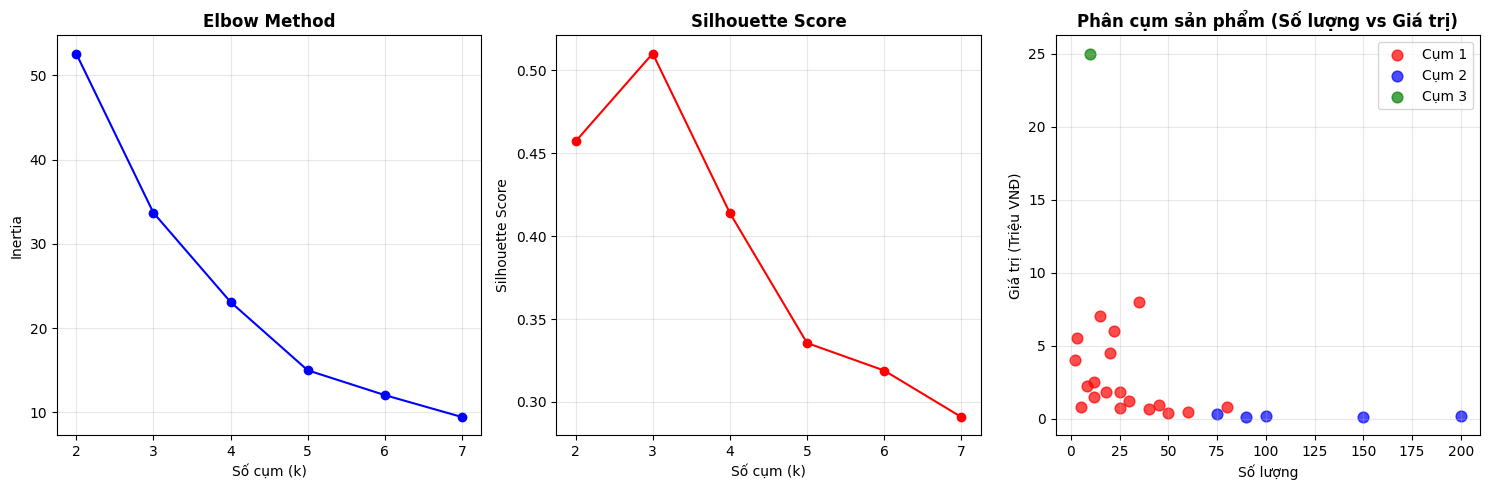


=== PHÂN TÍCH 3 CỤM SẢN PHẨM ===

--- CỤM 1 (19 sản phẩm) ---
Sản phẩm: ['Chuot khong day', 'Man hinh 27 inch', 'Ban phim co', 'Webcam HD', 'Loa Bluetooth', 'O cung ngoai 1TB', 'Tai nghe gaming', 'Router Wi-Fi 6', 'May in laser', 'Sac du phong 10000mAh', 'May chieu mini', 'Camera an ninh', 'But cam ung', 'Ba lo laptop', 'May tinh bang', 'Dien thoai thong minh', 'Dong ho thong minh', 'Loa gaming RGB', 'Man hinh gaming 24inch']
Số lượng TB: 26.7
Giá trị TB: 2,671,053 VNĐ
Đánh giá TB: 4.28
Lượt bán TB: 149.4

--- CỤM 2 (5 sản phẩm) ---
Sản phẩm: ['Ban di chuot lon', 'The nho MicroSD 64GB', 'Den LED RGB', 'Bo ve sinh laptop', 'Cap HDMI 2.0']
Số lượng TB: 123.0
Giá trị TB: 174,000 VNĐ
Đánh giá TB: 3.66
Lượt bán TB: 556.0

--- CỤM 3 (1 sản phẩm) ---
Sản phẩm: ['Laptop Dell']
Số lượng TB: 10.0
Giá trị TB: 25,000,000 VNĐ
Đánh giá TB: 4.50
Lượt bán TB: 85.0

=== ĐÁNH GIÁ TỔNG THỂ ===
Số cụm tối ưu: 3
Silhouette Score: 0.510
Inertia: 33.708

=== TÂM CÁC CỤM (KHÔNG GIAN GỐC) ===
       SoLuong  

In [7]:
# ============== VÍ DỤ 2: K-MEANS VỚI DỮ LIỆU SẢN PHẨM THỰC TẾ ==============
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Tạo dữ liệu sản phẩm mở rộng
np.random.seed(42)

products_data = {
    'TenSanPham': [
        'Laptop Dell', 'Chuot khong day', 'Man hinh 27 inch', 'Ban phim co', 'Webcam HD',
        'Loa Bluetooth', 'O cung ngoai 1TB', 'Tai nghe gaming', 'Router Wi-Fi 6', 'May in laser',
        'Ban di chuot lon', 'Sac du phong 10000mAh', 'The nho MicroSD 64GB', 'Den LED RGB', 'Bo ve sinh laptop',
        'May chieu mini', 'Camera an ninh', 'Cap HDMI 2.0', 'But cam ung', 'Ba lo laptop',
        'May tinh bang', 'Dien thoai thong minh', 'Dong ho thong minh', 'Loa gaming RGB', 'Man hinh gaming 24inch'
    ],
    'SoLuong': [10, 50, 15, 25, 5, 30, 12, 45, 8, 2, 100, 60, 200, 75, 90, 3, 18, 150, 25, 40, 20, 35, 12, 80, 22],
    'GiaTri': [25000000, 350000, 7000000, 1800000, 800000, 1200000, 1500000, 950000, 2200000, 4000000,
               150000, 450000, 200000, 300000, 120000, 5500000, 1800000, 100000, 750000, 650000,
               4500000, 8000000, 2500000, 800000, 6000000],
    'DanhGia': [4.5, 4.2, 4.0, 4.3, 3.8, 4.1, 4.4, 4.6, 4.2, 3.9, 3.5, 4.0, 4.1, 3.7, 3.6, 4.8, 4.3, 3.4, 4.2, 4.0,
                4.7, 4.8, 4.5, 4.1, 4.4],
    'LuotBan': [85, 220, 95, 180, 45, 150, 88, 280, 65, 25, 450, 320, 850, 380, 420, 15, 120, 680, 160, 210,
                110, 180, 95, 340, 140]
}

df = pd.DataFrame(products_data)

print("=== VÍ DỤ 2: PHÂN TÍCH SẢN PHẨM VỚI K-MEANS ===")
print("Dataset sản phẩm:")
print(df.head())
print(f"\nSố sản phẩm: {len(df)}")

# Chuẩn bị dữ liệu cho clustering
features = ['SoLuong', 'GiaTri', 'DanhGia', 'LuotBan']
X = df[features].values

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nCác feature sử dụng: {features}")
print("Dữ liệu đã được chuẩn hóa (StandardScaler)")

# Tìm số cụm tối ưu bằng Elbow method
inertias = []
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans_temp.fit_predict(X_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Vẽ biểu đồ Elbow và Silhouette
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K_range, inertias, 'bo-')
plt.title('Elbow Method', fontsize=12, fontweight='bold')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.title('Silhouette Score', fontsize=12, fontweight='bold')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, alpha=0.3)

# Chọn k=3 dựa trên kết quả
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Thêm kết quả vào DataFrame
df['Cluster'] = cluster_labels

# Vẽ scatter plot 2D (Số lượng vs Giá trị)
plt.subplot(1, 3, 3)
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['SoLuong'], cluster_data['GiaTri']/1000000,
               c=colors[i], label=f'Cụm {i+1}', alpha=0.7, s=60)

plt.title('Phân cụm sản phẩm (Số lượng vs Giá trị)', fontsize=12, fontweight='bold')
plt.xlabel('Số lượng')
plt.ylabel('Giá trị (Triệu VNĐ)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Phân tích từng cụm
print(f"\n=== PHÂN TÍCH {optimal_k} CỤM SẢN PHẨM ===")
for i in range(optimal_k):
    cluster_products = df[df['Cluster'] == i]
    print(f"\n--- CỤM {i+1} ({len(cluster_products)} sản phẩm) ---")
    print("Sản phẩm:", list(cluster_products['TenSanPham'].values))
    print(f"Số lượng TB: {cluster_products['SoLuong'].mean():.1f}")
    print(f"Giá trị TB: {cluster_products['GiaTri'].mean():,.0f} VNĐ")
    print(f"Đánh giá TB: {cluster_products['DanhGia'].mean():.2f}")
    print(f"Lượt bán TB: {cluster_products['LuotBan'].mean():.1f}")

# Đánh giá tổng thể
final_silhouette = silhouette_score(X_scaled, cluster_labels)
print(f"\n=== ĐÁNH GIÁ TỔNG THỂ ===")
print(f"Số cụm tối ưu: {optimal_k}")
print(f"Silhouette Score: {final_silhouette:.3f}")
print(f"Inertia: {kmeans_final.inertia_:.3f}")

# Hiển thị centroids trong không gian gốc
centroids_original = scaler.inverse_transform(kmeans_final.cluster_centers_)
print(f"\n=== TÂM CÁC CỤM (KHÔNG GIAN GỐC) ===")
centroid_df = pd.DataFrame(centroids_original, columns=features)
centroid_df.index = [f'Cụm {i+1}' for i in range(optimal_k)]
print(centroid_df.round(2))

# ============== PHÂN TÍCH ĐẦU RA K-MEANS CHO DỮ LIỆU SẢN PHẨM ===============
print(f"\n=== PHÂN TÍCH ĐẦU RA K-MEANS CHO DỮ LIỆU SẢN PHẨM ===")
print("1. LABELS_ - Nhãn cụm của từng sản phẩm:")
print(f"   - Shape: {kmeans_final.labels_.shape}")
print(f"   - Dạng dữ liệu: {type(kmeans_final.labels_)}")
print(f"   - Mảng 1 chiều với {kmeans_final.labels_.shape[0]} sản phẩm")
print(f"   - Nhãn cụm cho từng sản phẩm: {kmeans_final.labels_}")
print(f"   - Số cụm duy nhất: {np.unique(kmeans_final.labels_)}")

print(f"\n2. CLUSTER_CENTERS_ - Tọa độ tâm các cụm (đã chuẩn hóa):")
print(f"   - Shape: {kmeans_final.cluster_centers_.shape}")
print(f"   - Dạng dữ liệu: {type(kmeans_final.cluster_centers_)}")
print(f"   - Mảng 2 chiều: {optimal_k} cụm × {len(features)} features")
print(f"   - Centroids (chuẩn hóa):")
for i, center in enumerate(kmeans_final.cluster_centers_):
    print(f"     Cụm {i}: [{center[0]:.3f}, {center[1]:.3f}, {center[2]:.3f}, {center[3]:.3f}]")

# Phân tích mapping sản phẩm - cụm
print(f"\n3. MAPPING SẢN PHẨM - CỤM:")
for i in range(len(df)):
    product_name = df.iloc[i]['TenSanPham']
    cluster_id = kmeans_final.labels_[i]
    print(f"   - {product_name} → Cụm {cluster_id}")

# Thống kê phân bố cụm cho sản phẩm
unique_clusters, cluster_counts = np.unique(kmeans_final.labels_, return_counts=True)
print(f"\n4. PHÂN BỐ SẢN PHẨM TRONG CÁC CỤM:")
for cluster_id, count in zip(unique_clusters, cluster_counts):
    print(f"   - Cụm {cluster_id}: {count} sản phẩm ({count/len(df)*100:.1f}%)")


